In [1]:
%load_ext autoreload
%autoreload 2

home_or_office = "home"

import sys
if home_or_office =="home":
    sys.path.extend(['C:\\Code\\Libraries', 'C:/Code/Libraries'])
else:
    sys.path.extend(['C:\\Users\\troy\\Documents\\Code\\Libraries', 'C:\\Users\\troy\\Documents\\Excel Sheets', 
                     'C:/Users/troy/Documents/Code/Libraries'])

from datetime import date, datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [14]:
# Define the range of mu/sigma values
mu_sigma_range = np.linspace(-7, 7, 100)  # Adjust the number of points as needed

def RSI(sharpe):
    mu = sharpe  # Set mu to mu_sigma
    sigma = 1.0  # Standard deviation

    # Calculate Theoretical Conditional Means - mean for X < 0
    cdf_negative = norm.cdf(-mu_sigma)
    pdf_negative = norm.pdf(-mu_sigma)
    mean_condition_negative = mu - sigma * (pdf_negative / cdf_negative)
    
    # Calculate Theoretical Conditional Means - mean for X > 0, we are using the relation that E[x] = cdf(X>0) * E[x|X>0] + cdf(X<0) * E[x|X<0]
    mean_condition_positive  = (mu - mean_condition_negative * cdf_negative) / (1 - cdf_negative)

    # Calculate the ratio of conditional means and append to the list
    ratio = mean_condition_positive / abs(mean_condition_negative)
    rsi = ratio / (1 + ratio)
    return rsi, mean_condition_positive, abs(mean_condition_negative)


# Initialize an empty list to store the ratios
ratios = []
mean_positive = []
mean_negative = []

# Calculate the ratio for each mu/sigma value
for mu_sigma in mu_sigma_range:
    rsi, mean_condition_positive, mean_condition_negative = RSI(mu_sigma)
    ratios.append(rsi)
    mean_positive.append(mean_condition_positive)
    mean_negative.append(abs(mean_condition_negative))



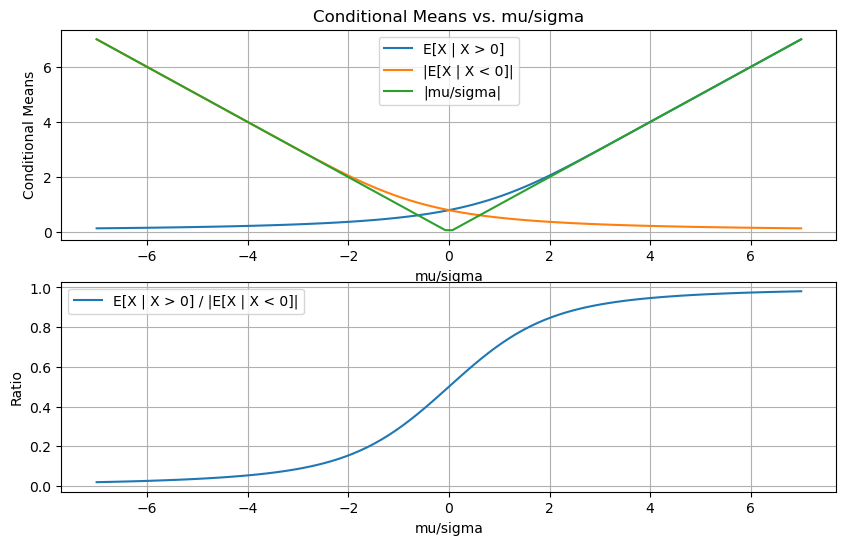

In [15]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(mu_sigma_range, mean_positive, label='E[X | X > 0]')
plt.plot(mu_sigma_range, mean_negative, label='|E[X | X < 0]|')
plt.plot(mu_sigma_range, np.abs(mu_sigma_range), label='|mu/sigma|')
plt.xlabel('mu/sigma')
plt.ylabel('Conditional Means')
plt.title('Conditional Means vs. mu/sigma')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.plot(mu_sigma_range, ratios, label='E[X | X > 0] / |E[X | X < 0]|')
plt.xlabel('mu/sigma')
plt.ylabel('Ratio')
plt.grid(True)
plt.legend()